In [1]:
# impor library yang diperlukan
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# impor dataset Kaggle-2
kaggle2 = pd.read_csv('../raw-datasets/Dataset-Kaggle2.csv', delimiter=';', decimal=',')

In [3]:
# cek total data
kaggle2.count()

Jenis Kelamin    499
Umur (Bulan)     499
Berat (KG)       499
Tinggi (CM)      499
dtype: int64

In [4]:
# ubah nama fitur
kaggle2.rename(columns={"Jenis Kelamin":"jenisKelamin", "Umur (Bulan)":"umur", "Berat (KG)":"beratBadan", "Tinggi (CM)":"tinggiBadan"}, inplace=True)

In [5]:
# cek kolom data bernilai kosong
kaggle2.isna().sum()

jenisKelamin    0
umur            0
beratBadan      0
tinggiBadan     0
dtype: int64

In [6]:
# cek tipe data
kaggle2.dtypes

jenisKelamin    object
umur             int64
beratBadan       int64
tinggiBadan      int64
dtype: object

In [7]:
# convert tipe data
kaggle2.beratBadan = kaggle2.beratBadan.astype('float64')
kaggle2.tinggiBadan = kaggle2.tinggiBadan.astype('float64')
kaggle2.dtypes

jenisKelamin     object
umur              int64
beratBadan      float64
tinggiBadan     float64
dtype: object

In [8]:
# cek max values
kaggle2.max()

jenisKelamin         p
umur                54
beratBadan        15.0
tinggiBadan     1020.0
dtype: object

In [9]:
# cek min values
kaggle2.min()

jenisKelamin      L
umur              4
beratBadan      1.0
tinggiBadan     0.0
dtype: object

In [10]:
# cek unique values pada setiap kolom
print(f'Jenis Kelamin: {kaggle2.jenisKelamin.unique()}')
print(f'Umur: {kaggle2.umur.unique()}')
print(f'Berat Badan: {kaggle2.beratBadan.unique()}')
print(f'Tinggi Badan: {kaggle2.tinggiBadan.unique()}')

Jenis Kelamin: ['P' 'L' 'p']
Umur: [24 28 30 25 23 21 27 32 22 31 19 41 13 11 14 43 37 34 45 35 36 38 44 29
 40 33 12 42 26 54  4 47 39  8  9 18 16 10  6 17 15 20  7]
Berat Badan: [ 5.  6.  8.  4.  3.  7.  9. 10. 12. 13. 11. 14.  1. 15.]
Tinggi Badan: [  80.   50.   70.   10.   90.   40.   20.    0.   60.   30.  960.  600.
  890. 1020.  770.  940.  700.  680.  720.  860.  750.  790.  810.  780.
  830.  690.  610.  650.  670.  730.  760.  800.  880.  840.  950.  850.]


In [11]:
# mengubah nilai jenis kelamin
kaggle2.replace('p', 'P', inplace=True)

In [12]:
# menghapus noise pada setiap fitur
noise_umur = kaggle2.loc[(kaggle2.umur < 0) | (kaggle2.umur > 60)]
kaggle2.drop(index = noise_umur.index, inplace=True)
noise_berat = kaggle2.loc[(kaggle2.beratBadan < 1.9) | (kaggle2.beratBadan > 31.2)]
kaggle2.drop(index = noise_berat.index, inplace=True)
noise_tinggi = kaggle2.loc[(kaggle2.tinggiBadan < 43.6 ) | (kaggle2.tinggiBadan > 123.9)]
kaggle2.drop(index = noise_tinggi.index, inplace=True)

In [13]:
# cari outlier umur dataset Kaggle-2
# mencari nilai Q1 dan Q3
Q1_umur = kaggle2.umur.quantile(0.25)
Q3_umur = kaggle2.umur.quantile(0.75)
# mencari IQR, batas bawah, dan batas atas
IQR_umur = Q3_umur - Q1_umur
umur_bawah = Q1_umur - 1.5 * IQR_umur
umur_atas = Q3_umur + 1.5 * IQR_umur
# mencari outlier data
outlier_umur = kaggle2.loc[(kaggle2.umur < umur_bawah) | (kaggle2.umur > umur_atas)]

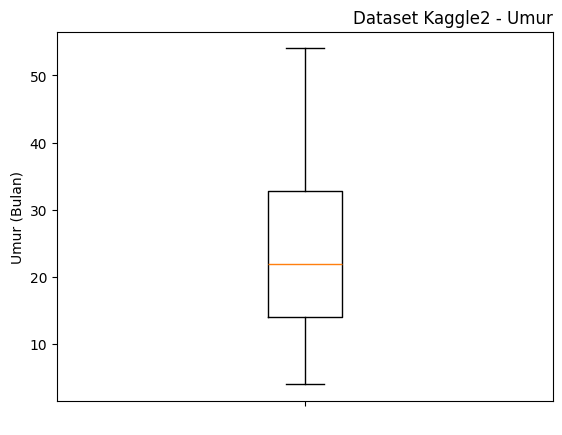

In [14]:
# visualisasi outlier age
plt.boxplot(kaggle2.umur, tick_labels=[' '], sym='x')
plt.ylabel('Umur (Bulan)')
plt.title('Dataset Kaggle2 - Umur', loc='right')
plt.show()

In [15]:
# cari outlier beratBadan dataset Kaggle-2
# mencari nilai Q1 dan Q3
Q1_berat = kaggle2.beratBadan.quantile(0.25)
Q3_berat = kaggle2.beratBadan.quantile(0.75)
# mencari IQR, batas bawah, dan batas atas
IQR_berat = Q3_berat - Q1_berat
berat_bawah = Q1_berat - 1.5 * IQR_berat
berat_atas = Q3_berat + 1.5 * IQR_berat
# mencari outlier data
outlier_berat = kaggle2.loc[(kaggle2.beratBadan < berat_bawah) | (kaggle2.beratBadan > berat_atas)]

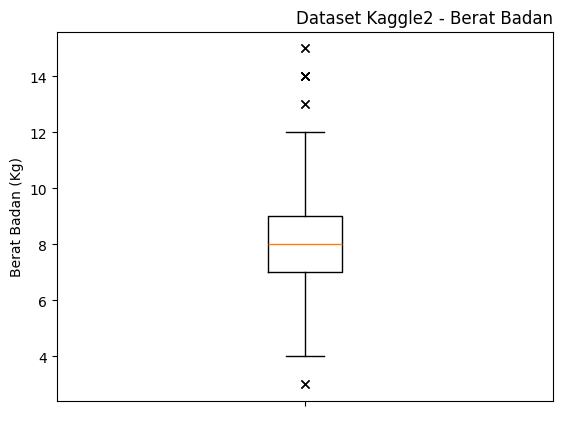

In [16]:
# visualisasi outlier beratBadan
plt.boxplot(kaggle2.beratBadan, tick_labels=[' '], sym='x')
plt.ylabel('Berat Badan (Kg)')
plt.title('Dataset Kaggle2 - Berat Badan', loc='right')
plt.show()

In [17]:
# cari outlier tinggiBadan dataset Kaggle-2
# mencari nilai Q1 dan Q3
Q1_tinggi = kaggle2.tinggiBadan.quantile(0.25)
Q3_tinggi = kaggle2.tinggiBadan.quantile(0.75)
# mencari IQR, batas bawah, dan batas atas
IQR_tinggi = Q3_tinggi - Q1_tinggi
tinggi_bawah = Q1_tinggi - 1.5 * IQR_tinggi
tinggi_atas = Q3_tinggi + 1.5 * IQR_tinggi
# mencari outlier data
outlier_tinggi = kaggle2.loc[(kaggle2.tinggiBadan < tinggi_bawah) | (kaggle2.tinggiBadan > tinggi_atas)]

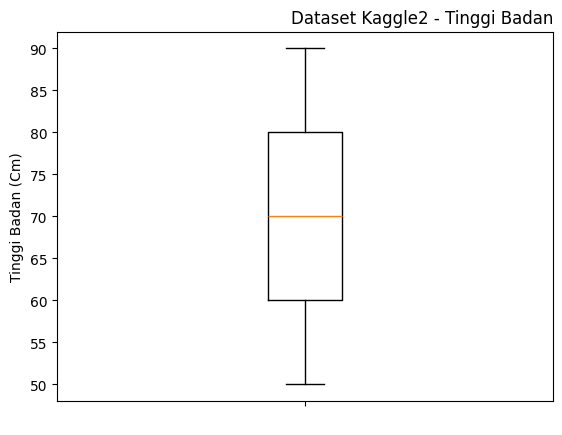

In [18]:
# visualisasi outlier beratBadan
plt.boxplot(kaggle2.tinggiBadan, tick_labels=[' '], sym='x')
plt.ylabel('Tinggi Badan (Cm)')
plt.title('Dataset Kaggle2 - Tinggi Badan', loc='right')
plt.show()

In [19]:
# hapus data duplikat
kaggle2.drop_duplicates(inplace=True)

In [20]:
# acak susunan dataset
kaggle2 = kaggle2.sample(frac=1, ignore_index=True, random_state=18062025)

In [21]:
# ekspor dataset
kaggle2.to_csv('kaggle2-clean.csv', index=False)